In [3]:
# Want to make sure the correct version of scikit learn is installed
pip install -U scikit-learn

SyntaxError: invalid syntax (<ipython-input-3-50eaac566193>, line 2)

# Importing Packages

In [5]:
# Importing all of the packages we anticipate to use
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [6]:
#Import data and see the headers
df = pd.read_csv(r"Terry_Cleaned_Dummies.csv")
df.head()

,Unnamed: 0,Officer YOB,Officer Gender,Subject Perceived Gender,Arrest Flag,Frisk Flag,Reported Year,Reported Month,Subject Age Group_1 - 17,Subject Age Group_18 - 25,...,Precinct_South,Precinct_SouthWest,Precinct_West,Reported Day of Week_Friday,Reported Day of Week_Monday,Reported Day of Week_Saturday,Reported Day of Week_Sunday,Reported Day of Week_Thursday,Reported Day of Week_Tuesday,Reported Day of Week_Wednesday
0,0,1984,1.0,1.0,0.0,0.0,2015,10,0,0,...,1,0,0,1,0,0,0,0,0,0
1,4,1977,1.0,1.0,0.0,0.0,2015,4,0,0,...,0,0,1,1,0,0,0,0,0,0
2,5,1973,1.0,1.0,0.0,0.0,2015,4,0,0,...,0,0,1,0,0,0,1,0,0,0
3,6,1985,1.0,0.0,0.0,0.0,2015,5,0,0,...,0,0,1,0,0,0,0,0,0,1
4,7,1985,1.0,1.0,0.0,0.0,2015,5,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
# First we must split 
X = df.drop(columns=['Arrest Flag'], axis=1)
y = df['Arrest Flag']

In [8]:
#Split features and target
X = df.drop(columns=['Frisk Flag'], axis=1)
y = df['Frisk Flag']

#Create function to easily build models and display results
def build_model(classifier, predictors, labels):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    #Scale the data
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Create variables that can be called outside function
    build_model.X_train = X_train
    build_model.X_test = X_test
    build_model.y_train = y_train
    build_model.y_test = y_test
    
    #Fit model
    model = classifier.fit(X_train, y_train)
    score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))
    
    #Create predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    #Create variables that can be called outside function
    build_model.y_hat_train = y_hat_train
    build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
                             round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
                          columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0])
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1])
    plt.subplots_adjust(wspace=0.4)
    return model

# Logistic Regression

### Classifies using a curved probability graph

Train Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     27064
         1.0       0.78      0.26      0.39      7956

    accuracy                           0.82     35020
   macro avg       0.80      0.62      0.64     35020
weighted avg       0.81      0.82      0.78     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.90      6865
         1.0       0.76      0.24      0.37      1891

    accuracy                           0.82      8756
   macro avg       0.79      0.61      0.63      8756
weighted avg       0.81      0.82      0.78      8756

Train Accuracy: 0.816
Test Accuracy: 0.82
Cross Validation Recall 0.0


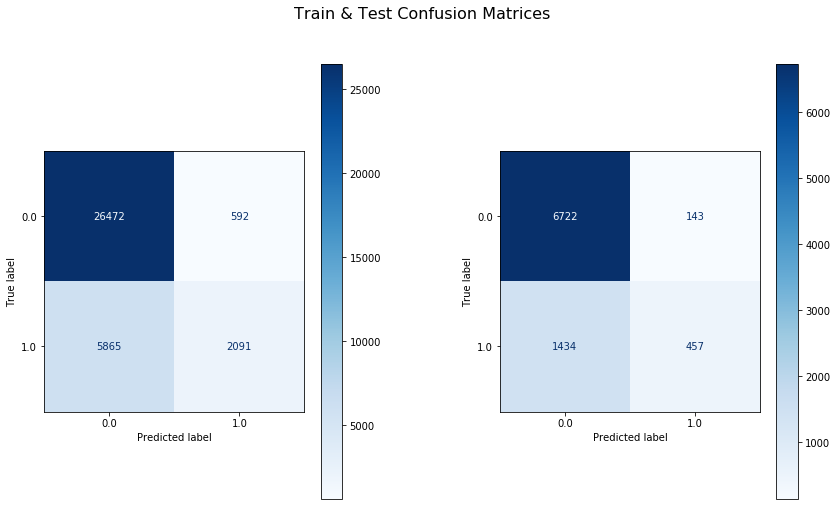

In [9]:
# Now let's see that Logistic Regression Model
logregmodel = build_model(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state=123), X, y)
logregmodel_results = build_model.results

### Train Accuracy: 0.816
### Test Accuracy: 0.82
### Cross Validation Recall 0.0

# Baye's Classification Model

### Classifies based on conditional probabilities of finding certain features

Train Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88     27064
         1.0       0.66      0.31      0.42      7956

    accuracy                           0.81     35020
   macro avg       0.74      0.63      0.65     35020
weighted avg       0.79      0.81      0.78     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      6865
         1.0       0.65      0.30      0.41      1891

    accuracy                           0.81      8756
   macro avg       0.74      0.63      0.65      8756
weighted avg       0.79      0.81      0.79      8756

Train Accuracy: 0.807
Test Accuracy: 0.814
Cross Validation Recall 0.508


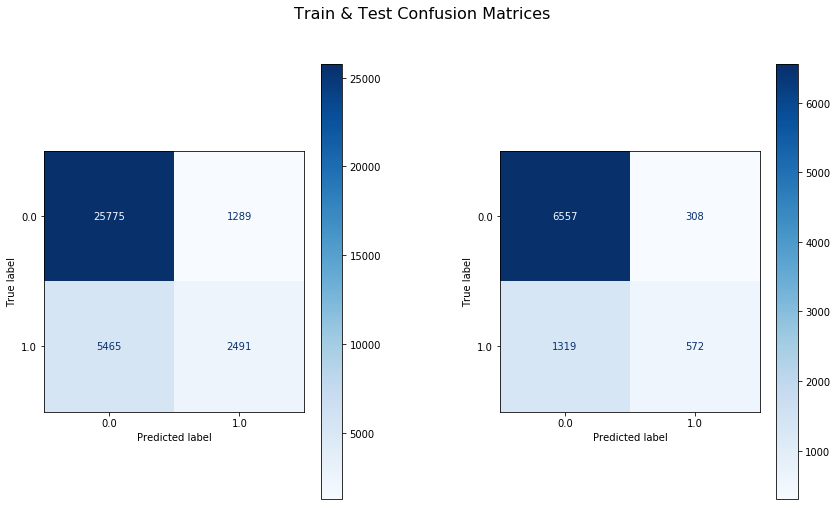

In [10]:
bayesmodel = build_model(MultinomialNB(), X, y)
bayesmodel_results = build_model.results

### Train Accuracy: 0.807
### Test Accuracy: 0.814
### Cross Validation Recall 0.508

# Multinomial Bayes Model

Train Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88     27064
         1.0       0.66      0.31      0.42      7956

    accuracy                           0.81     35020
   macro avg       0.74      0.63      0.65     35020
weighted avg       0.79      0.81      0.78     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      6865
         1.0       0.65      0.30      0.41      1891

    accuracy                           0.81      8756
   macro avg       0.74      0.63      0.65      8756
weighted avg       0.79      0.81      0.79      8756

Train Accuracy: 0.807
Test Accuracy: 0.814
Cross Validation Recall 0.508


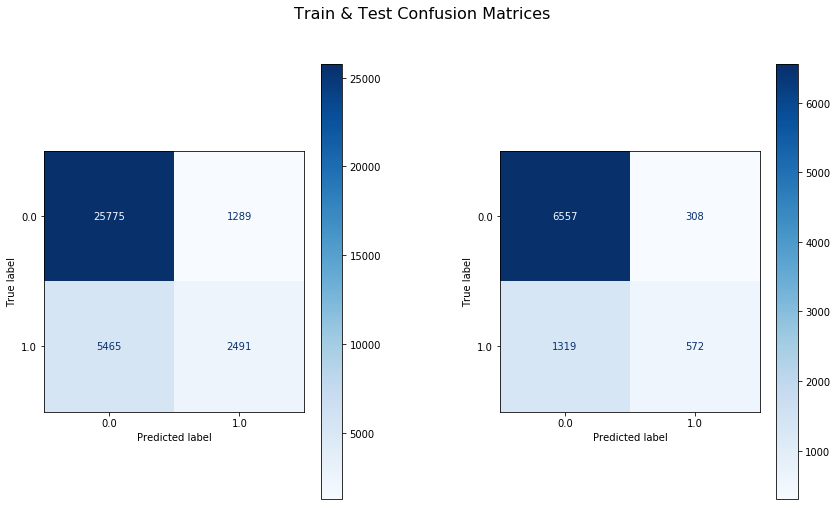

In [11]:
multinomialbayesmodel = build_model(MultinomialNB(), X, y)
multinomialmodel_results = build_model.results

### Train Accuracy: 0.807
### Test Accuracy: 0.814
### Cross Validation Recall 0.508

# Decision Tree Model

### Classifies based on conditional probabilities, splits based on Gini/entropy

Train Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27064
         1.0       1.00      1.00      1.00      7956

    accuracy                           1.00     35020
   macro avg       1.00      1.00      1.00     35020
weighted avg       1.00      1.00      1.00     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      6865
         1.0       0.41      0.45      0.43      1891

    accuracy                           0.74      8756
   macro avg       0.62      0.63      0.63      8756
weighted avg       0.75      0.74      0.74      8756

Train Accuracy: 1.0
Test Accuracy: 0.739
Cross Validation Recall 0.561


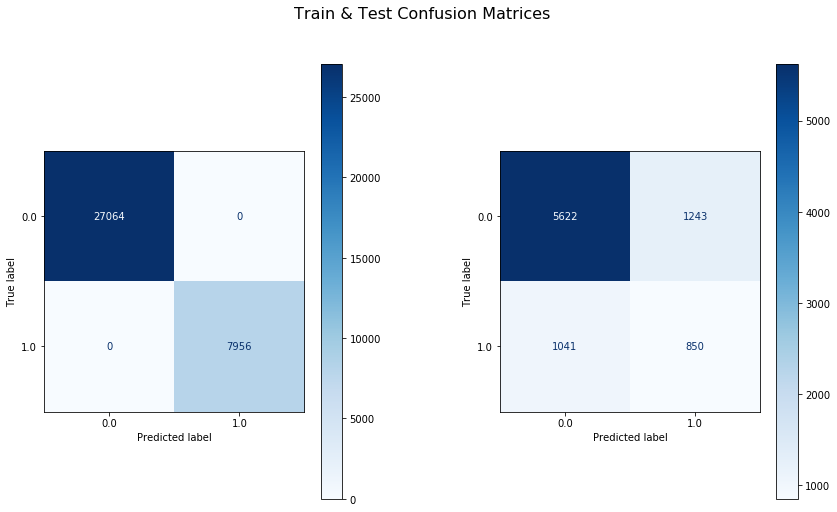

In [12]:
descisionmodel = build_model(DecisionTreeClassifier(random_state=123), X, y)
decisionmodel_results = build_model.results

### Train Accuracy: 1.0
### Test Accuracy: 0.739
### Cross Validation Recall 0.561

# Random Forest Model

### Uses multiple decision trees to create a "forest"; each tree uses a random set of sample features

Train Classification Report
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27064
         1.0       1.00      1.00      1.00      7956

    accuracy                           1.00     35020
   macro avg       1.00      1.00      1.00     35020
weighted avg       1.00      1.00      1.00     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      6865
         1.0       0.73      0.33      0.45      1891

    accuracy                           0.83      8756
   macro avg       0.79      0.65      0.68      8756
weighted avg       0.82      0.83      0.80      8756

Train Accuracy: 1.0
Test Accuracy: 0.829
Cross Validation Recall 0.47


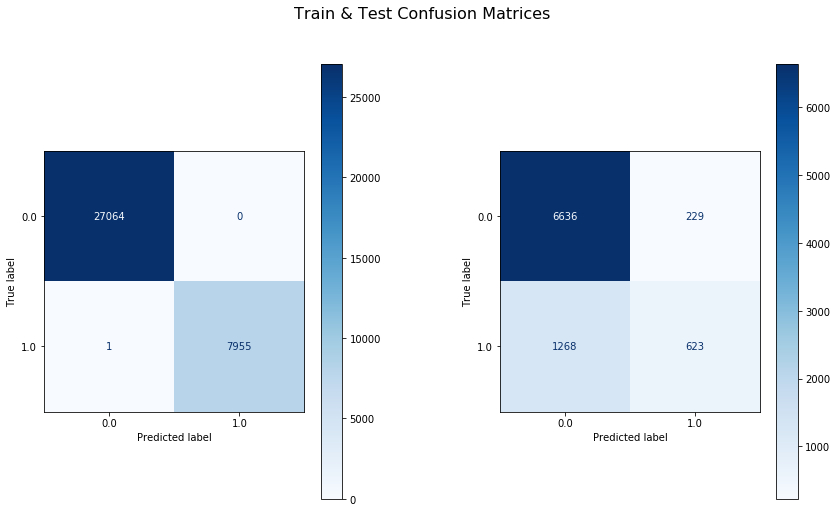

In [13]:
randomforestmodel = build_model(RandomForestClassifier(random_state=123), X, y)
randomforestmodel_results = build_model.results

### Train Accuracy: 1.0
### Test Accuracy: 0.829
### Cross Validation Recall 0.47

# XGBoost Model

### Stands for “Extreme Gradient Boosting”. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. 

Train Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89     27064
         1.0       0.82      0.25      0.38      7956

    accuracy                           0.82     35020
   macro avg       0.82      0.62      0.64     35020
weighted avg       0.82      0.82      0.78     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.90      6865
         1.0       0.79      0.23      0.36      1891

    accuracy                           0.82      8756
   macro avg       0.81      0.61      0.63      8756
weighted avg       0.82      0.82      0.78      8756

Train Accuracy: 0.817
Test Accuracy: 0.82
Cross Validation Recall 0.461


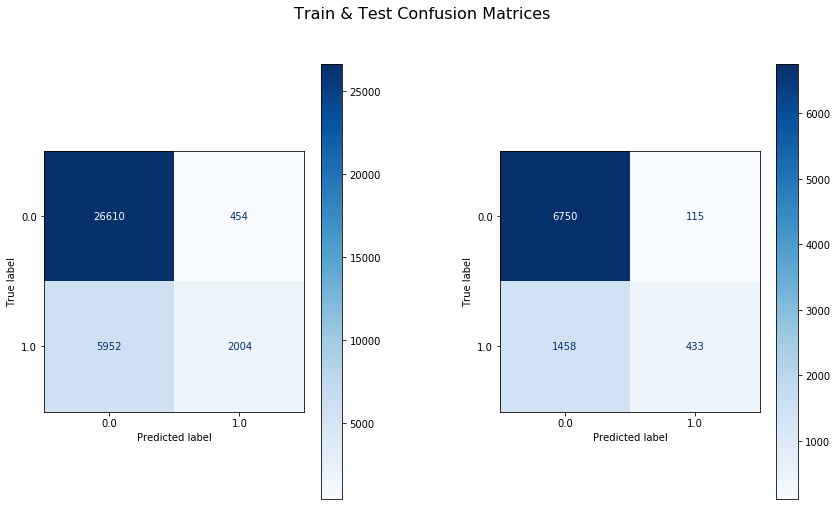

In [14]:
xgboostmodel = build_model(xgboost.XGBClassifier(random_state=123), X, y)
xgboostmodel9_results = build_model.results

### Train Accuracy: 0.817
### Test Accuracy: 0.82
### Cross Validation Recall 0.461

# Hyptertuning with an XGBoost Model

In [21]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [1, 2, 3],
    'n_estimators': [50, 100],
    'scale_pos_weight': [5]
}

In [22]:
grid_clf = GridSearchCV(xgboost.XGBClassifier(random_state=123), param_grid=param_grid, scoring='recall', 
                        cv=3, n_jobs=1, return_train_score=True)
grid_clf.fit(build_model.X_train, build_model.y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
# Mean training score
gs_training_score = np.mean(grid_clf.cv_results_['mean_train_score'])

# Mean test score
gs_testing_score = grid_clf.score(build_model.X_test, build_model.y_test)

print(f"Mean Training Score: {gs_training_score :.2%}")
print(f"Mean Test Score: {gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
grid_clf.best_params_

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 1
n_estimators: 50
scale_pos_weight: 5
Mean Training Score: 78.91%
Mean Test Score: 79.27%
Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.1,
 'max_depth': 1,
 'n_estimators': 50,
 'scale_pos_weight': 5}

Train Classification Report
               precision    recall  f1-score   support

         0.0       0.89      0.53      0.67     27064
         1.0       0.33      0.78      0.46      7956

    accuracy                           0.59     35020
   macro avg       0.61      0.66      0.57     35020
weighted avg       0.76      0.59      0.62     35020

Test Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.54      0.68      6865
         1.0       0.32      0.79      0.46      1891

    accuracy                           0.60      8756
   macro avg       0.61      0.67      0.57      8756
weighted avg       0.78      0.60      0.63      8756

Train Accuracy: 0.589
Test Accuracy: 0.597
Cross Validation Recall 0.744


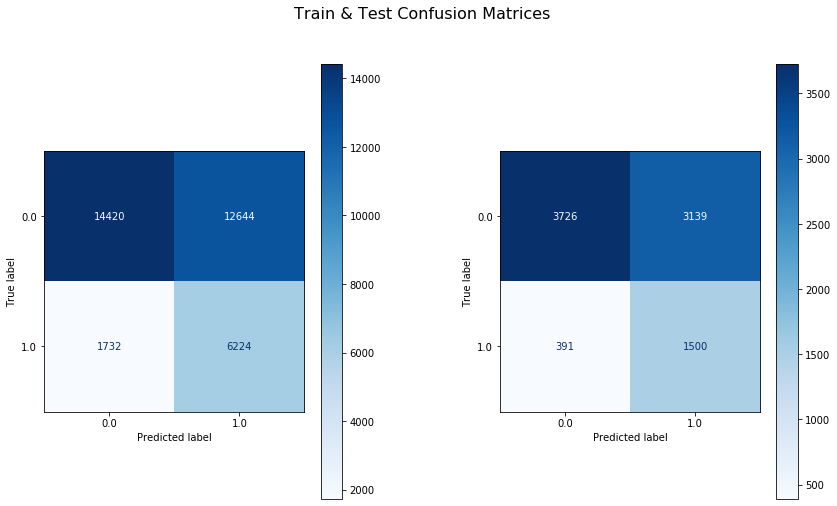

In [24]:
xgboosttuningmodel = build_model(xgboost.XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=50, 
                                          scale_pos_weight=5, random_state=123), X, y)
xgboosttuningmodel_results = build_model.results

## Train Accuracy: 0.589
## Test Accuracy: 0.597
## Cross Validation Recall 0.744

# Final Findings

In [26]:
#Create feature importance dataframe
xg_features = pd.DataFrame(xgboosttuningmodel.feature_importances_, X.columns, columns=['importance'])
xg_features = xg_features.sort_values(by=['importance'], ascending=False)
xg_features

,importance
Weapon Type_None,0.295176
Precinct_South,0.154672
Call Type_911,0.104071
Precinct_West,0.091664
Subject Perceived Gender,0.090607
Subject Perceived Race_White,0.062610
Officer Squad_S,0.059049
Officer Squad_W,0.023703
Officer Squad_Other,0.022628
Subject Perceived Race_Black or African American,0.019904


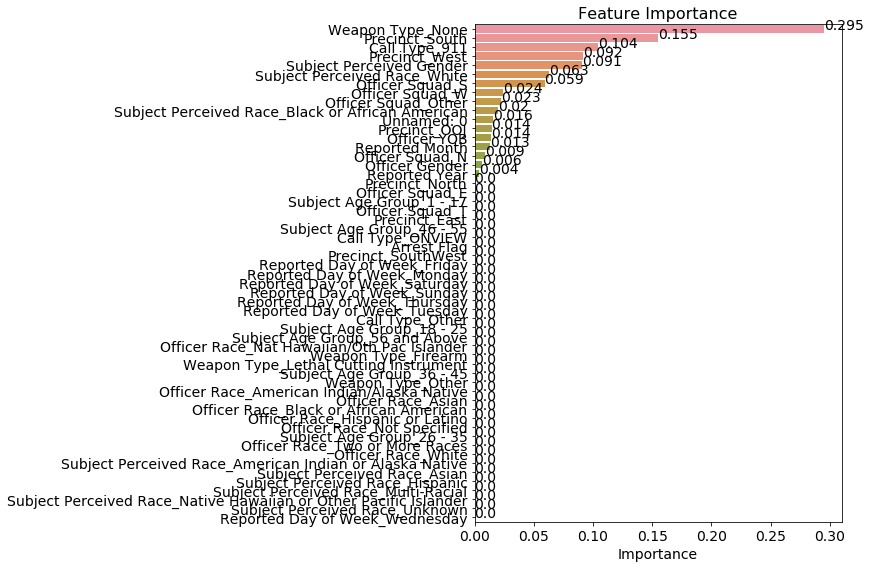

In [27]:
#Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(y=xg_features.index, x=xg_features['importance'])
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for ind, val in enumerate(xg_features['importance']):
    plt.text(x=val, y=ind, s=round(val, 3), fontsize=14)
plt.tight_layout()
plt.show()

## In conclusion: Our XGBoost Model worked the best. We used this model to see what features had the greatest importance to our target of arrest flag. 

## The top features were Weapon Type_None, Precinct_South, Call Type 911, Precinct_West, Subject Perceived Gender, Subject Perceived Race_White. This tells us that possessing a weapon was by far the strongest feature of importance. 

## In second was precint south and west This may show us that this area may need to be evaluated for their practices and/or research needs to be done to understand why this area has such a high level of arrest. 

## The third feature importance was subject perceived gender. In our EDA we explored this and also found that there is a clear difference in gender. This may show that women are seen as less of a threat to the officers that are evaluating whether to stop them and/or arrest these subjects.

## The last feature of importance is seen to be subject perceived race as white. This can indicate that there is also biases happening so that those who are pulled over and white subjects are less likely to be arrested. 